# <font color='#d50283'>IT Academy - Ciència de Dades (online)</font>
## Tasca M6 T01:   
### Exercicis per practicar amb regressions.
### Juan Javier Hidalgo Gómez

### <font color='#d50283'>- Generación del Entorno de trabajo</font>

<font color='#00913f'>*Descripción de las variables:*</font>  
* **CRIM**: tasa de criminalidad per cápita por ciudad
* **ZN**: proporción de terreno residencial zonificado para lotes de más de 25,000 pies cuadrados.
* **INDUS**: proporción de acres comerciales no minoristas por ciudad.
* **CHAS**: variable ficticia del río Charles (1 si el tramo limita con el río; 0 en caso contrario)
* **NOX**: concentración de óxidos nítricos (partes por 10 millones)
* **RM**: número promedio de cuartos por vivienda
* **AGE**: proporción de unidades ocupadas por propietarios construidas antes de 1940
* **DIS**: distancias ponderadas a cinco centros de empleo
* **RAD**: índice de accesibilidad a las carreteras radiales
* **TAX**: tasa de impuestos sobre la propiedad de valor total por cada $10,000
* **PTRATIO**: ratio alumno-profesor por localidad
* **B**: 1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad
* **LSTAT**: % estado más bajo de la población
* **MEDV**: valor medio de las viviendas ocupadas por sus propietarios en miles de dólares


In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
from scipy import stats
from itertools import zip_longest
from colorama import init, Fore, Back, Style
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, PowerTransformer,normalize
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler,MinMaxScaler,Normalizer,Binarizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression as SKLR
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')


import pylab
from scipy.stats import ttest_1samp, ttest_ind, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import shapiro,pearsonr,normaltest,anderson,boxcox


# Configuration
%matplotlib inline
set_config(display='diagram')

import warnings
warnings.filterwarnings('ignore')


#Variables genéricas:
#path=r'C:\Users\Nitropc\IT Academy\Data Science\Proyecto Data Science\Fuente de Datos\heart.csv'
path=r'C:\Users\Nitropc\IT Academy\Data Science\DS_Sprint_06\Fuente de Datos\housing data.csv'
#Funciones
# Intento de Mecanizar acciones/herramientas para el analisis de cualquier DataSet
# Guardar información de los pasos EDA





#Cuerpo 
#data = pd.read_csv(path,sep=',',encoding='ISO-8859-1')
data = pd.read_csv(path,sep=',',encoding='latin-1')
data.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']



### Información del contenido de los Ficheros:

In [2]:
print(Style.BRIGHT +'DataSet housing data:'+Style.RESET_ALL)
# Primeras cinco filas
print(data.head())

DataSet housing data:
      CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  \
0  0.02731  0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0     17.8   
1  0.02729  0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0     17.8   
2  0.03237  0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0     18.7   
3  0.06905  0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0     18.7   
4  0.02985  0.0   2.18     0  0.458  6.430  58.7  6.0622    3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   9.14  21.6  
1  392.83   4.03  34.7  
2  394.63   2.94  33.4  
3  396.90   5.33  36.2  
4  394.12   5.21  28.7  


### Análisis Exploratorio de Datos(EDA)

+ **Comprobamos valores nulos y NaN.**

In [3]:
print(Style.BRIGHT +'DataSet housing data:'+Style.RESET_ALL)
display(data.isnull().sum().sort_values(ascending = False))
display(data.isna().sum().sort_values(ascending = False))


DataSet housing data:


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

+ **Comprobamos valores duplicados.**

In [4]:
data.duplicated().sum()

0

**Nota:**  
El DataSet no contiene NaN, nulos ni duplicados.

+ **Tamaño y tipos de Datos.**

In [5]:
print(Style.BRIGHT +'DataSet housing data:'+Style.RESET_ALL)
print('El DataSet housing data contiene', data.shape[0], 'filas y', data.shape[1], 'columnas.')
print(data.info())

DataSet housing data:
El DataSet housing data contiene 505 filas y 14 columnas.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    float64
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB
None


+ **Estadística descriptiva del DataSet.**

In [6]:
def EstaDescrip(num):
    #Añadimos describe
    df = num.describe().T
    #Añadimos la mediana
    df['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    df = df.iloc[:,[0,1,8,2,3,4,5,6,7]]

    return(df)

In [7]:
print(Style.BRIGHT +'Estadística descriptiva del DataSet housing data:'+Style.RESET_ALL)
#data.describe().round(2).T
EstaDescrip(data.select_dtypes('number'))


Estadística descriptiva del DataSet housing data:


,count,mean,median,std,min,25%,50%,75%,max
CRIM,505.0,3.620667,0.25915,8.608572,0.00906,0.08221,0.25915,3.67822,88.9762
ZN,505.0,11.350495,0.00000,23.343704,0.00000,0.00000,0.00000,12.50000,100.0000
INDUS,505.0,11.154257,9.69000,6.855868,0.46000,5.19000,9.69000,18.10000,27.7400
CHAS,505.0,0.069307,0.00000,0.254227,0.00000,0.00000,0.00000,0.00000,1.0000
NOX,505.0,0.554728,0.53800,0.115990,0.38500,0.44900,0.53800,0.62400,0.8710
RM,505.0,6.284059,6.20800,0.703195,3.56100,5.88500,6.20800,6.62500,8.7800
AGE,505.0,68.581584,77.70000,28.176371,2.90000,45.00000,77.70000,94.10000,100.0000
DIS,505.0,3.794459,3.19920,2.107757,1.12960,2.10000,3.19920,5.21190,12.1265
RAD,505.0,9.566337,5.00000,8.707553,1.00000,4.00000,5.00000,24.00000,24.0000
TAX,505.0,408.459406,330.00000,168.629992,187.00000,279.00000,330.00000,666.00000,711.0000


+ **Prueba de Contraste de Normalidad.**  
  - Gráfica de Histograma.
  - Gráfico Quantile-Quantile.
  - Prueba Shapiro-Wilks.


In [8]:
def crearhistograma(df,columnas):
    fig, axes = plt.subplots(3, 5, figsize=(20, 10))

    for idx, (col, ax) in enumerate(zip(columnas, axes.flatten())):
        sns.distplot(df[columnas].iloc[: , idx], color = colors[idx], ax = ax, kde_kws=dict(linewidth=3))
        
        plt.subplots_adjust(wspace=.5, hspace=.5)
    else:
        [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]



In [9]:
def crearquantile(df,columnas):

  
    fig, axes = plt.subplots(3, 5, figsize=(20, 10))

    for idx, (col, ax) in enumerate(zip(columnas, axes.flatten())):
        stats.probplot(df[columnas].iloc[: , idx],dist='norm',plot=ax)
        plt.subplots_adjust(wspace=.5, hspace=.5)
        ax.set_title("Gráfica Q-Q "+ str(col))
    else:
        [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]

In [10]:
#Bucle para Shapiro-Wilk a todas las columnas del dataset
def crearShapiro(df,columnas):  
    #dataset para la prueba de Shapiro
    datoShapiro=[]
    alfa=0.05
    print(Style.BRIGHT +'Resultado del Test de Hipótesis:'+Style.RESET_ALL)
    #print(Style.BRIGHT + Fore.GREEN+'Shapiro-Wilk: \n'+Style.RESET_ALL)
   
    for i in df[columnas]:        
        stat, p = shapiro(df[i])
        #print(Style.BRIGHT + Fore.BLACK+f'{i}:'+Style.RESET_ALL)
        #print(Fore.RESET+'t-statistic = %.3f\np-value = %.6f' % (stat, p))
        if p > alfa:
            #print(Fore.BLUE+f'No podemos rechazar Ho con un nivel de significancia del {alfa*100} %,\nel atributo tiene una distribucción normal(Probably Gaussian).\n'+Style.RESET_ALL)
            sha_datos=[i,round(stat,8),round(p,8),'Probably Gaussian']
            datoShapiro.append(sha_datos)
        else:
            #print(Fore.RED+f'Podemos rechazar Ho con un nivel de significancia del {alfa*100} %,\nel atributo no tiene una distribucción normal(Not Probably Gaussian).\n'+Style.RESET_ALL)
            sha_datos=[i,round(stat,8),round(p,8),'Not Probably Gaussian']
            datoShapiro.append(sha_datos)

    TablaShapiro=pd.DataFrame(datoShapiro,
         columns=['Atributo','Stat','p-value','Resultado'])
    TablaShapiro = TablaShapiro.style.set_properties(**{'text-align': 'left'})
    display(TablaShapiro)    

    #print(Fore.RESET+'---------- \n')

In [11]:
# Distribución de todos los predictores
features=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
target=['MEDV']
colors =["#58FA82", "#F5A9A9", "#81DAF5", "#FBEFEF", '#F5A9F2', '#F5DA81',
         '#A9F5A9',"#58ACFA", "#00FF80", "#DF0101", '#DF013A', '#FF00FF',
         '#40FF00']


- Distribución de los atributos independientes
 


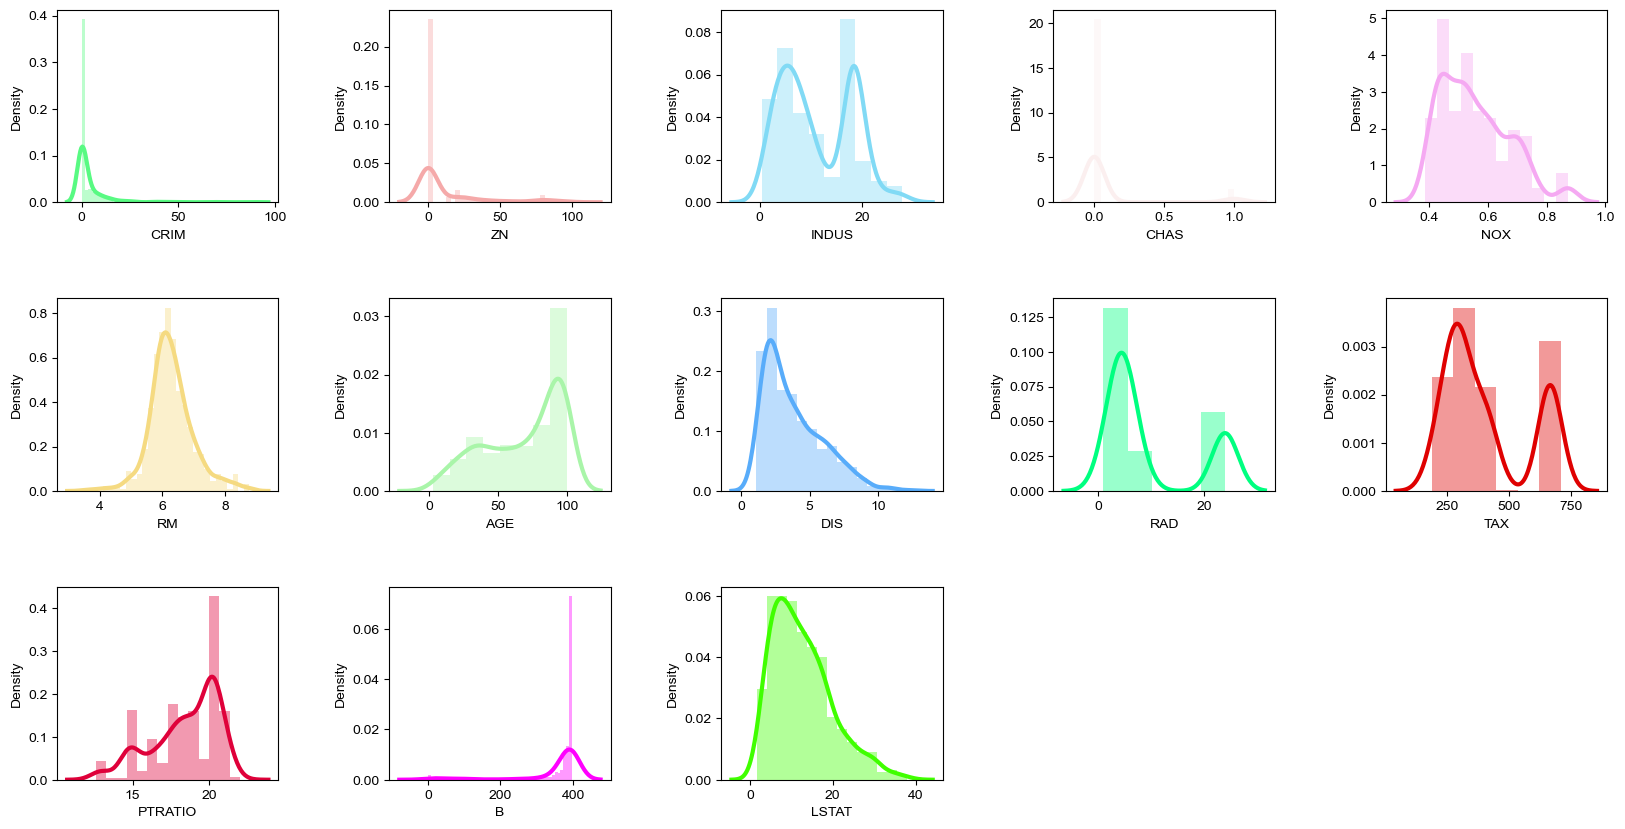

In [12]:

#print(Style.BRIGHT +'\nPruebas de Contraste de Normalidad:\n '+Style.RESET_ALL)
print('\n- Distribución de los atributos independientes\n ')
crearhistograma(data,features)
sns.set_theme(style="white", rc=None)

Podemos ver la distribución de cada predictor, algunos de ellos parecen cercanos a una distribución normal, podemos comprobar si siguen una distribución normal utilizando la Prueba de Normalidad de Shapiro-Wilk. Nuestra Hipótesis es:

- H₀: Los datos se distribuyen normalmente.
- H₁: Los datos no se distribuyen normalmente.  

Crearemos una función que compruebe la distribución para cada objetivo:

In [13]:
print('\n- Prueba Shapiro-Wilk:\n ')
crearShapiro(data,features)
sns.set_theme(style="white", rc=None)


- Prueba Shapiro-Wilk:
 
Resultado del Test de Hipótesis:


,Atributo,Stat,p-value,Resultado
0,CRIM,0.450395,0.000000,Not Probably Gaussian
1,ZN,0.554888,0.000000,Not Probably Gaussian
2,INDUS,0.900003,0.000000,Not Probably Gaussian
3,CHAS,0.275095,0.000000,Not Probably Gaussian
4,NOX,0.935542,0.000000,Not Probably Gaussian
5,RM,0.960769,0.000000,Not Probably Gaussian
6,AGE,0.891460,0.000000,Not Probably Gaussian
7,DIS,0.902869,0.000000,Not Probably Gaussian
8,RAD,0.679265,0.000000,Not Probably Gaussian
9,TAX,0.815545,0.000000,Not Probably Gaussian



- Gráfica Quantile-Quantile:
 


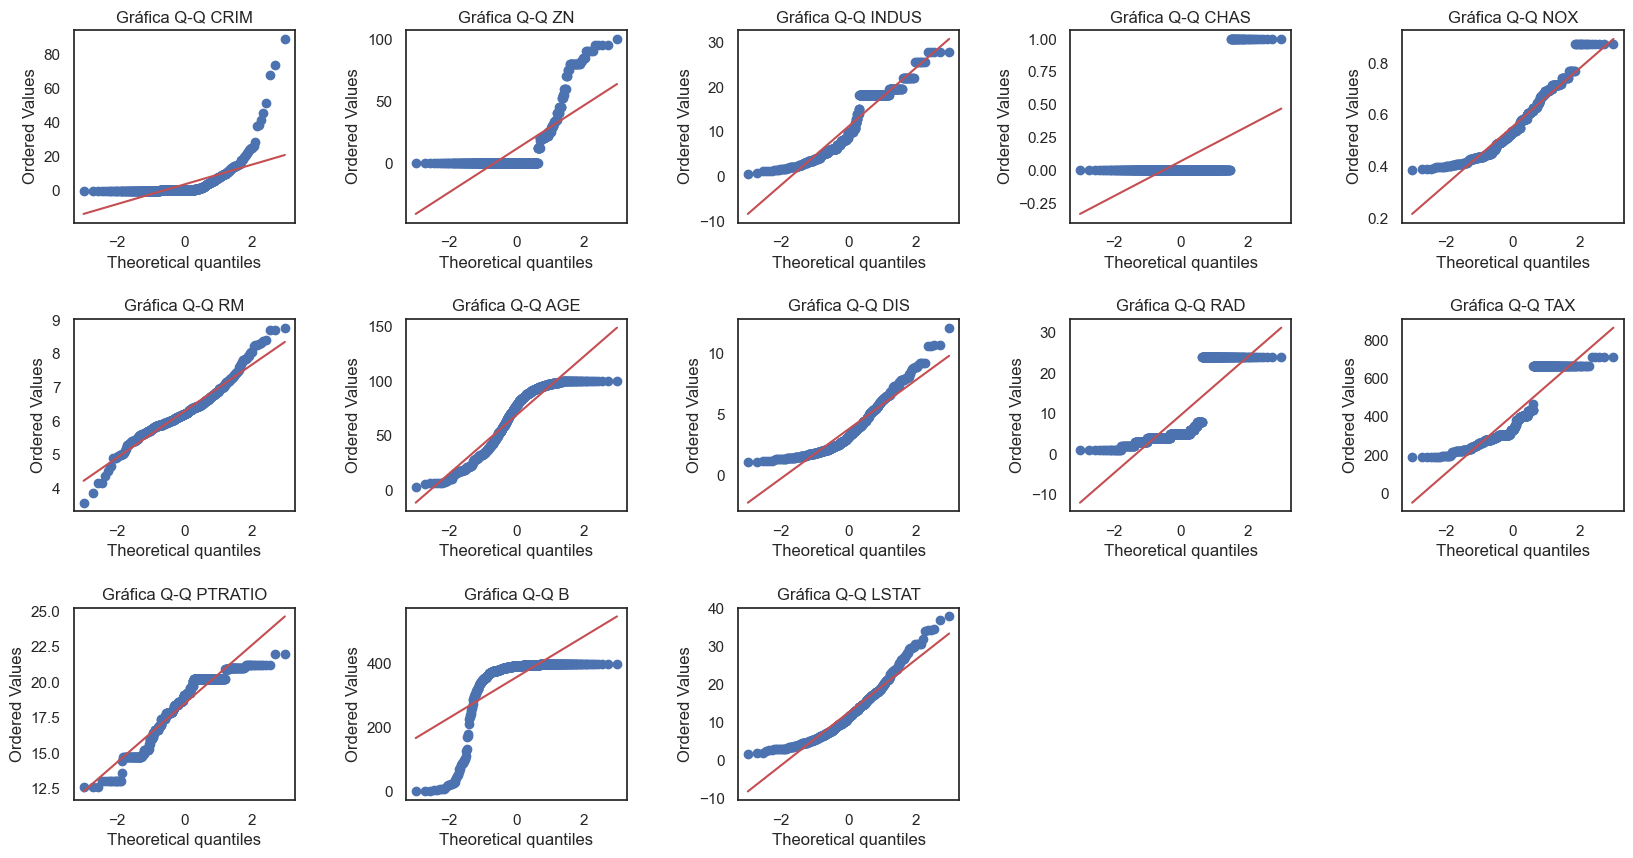

In [14]:
print('\n- Gráfica Quantile-Quantile:\n ')
crearquantile(data,features)
sns.set_theme(style="white", rc=None)

**Nota:**  
Tras realizar la prueba de contraste de normalidad comprobamos que ninguna de las variables sigue una distribución normal. 

+ **Evaulación del coeficiente de correlación de los atributos.**

1. Analizamos todos los atributos:

In [15]:
Tabla=data.corr()
Coef=0.70

#Código para solo presentar los atributos que tiene un coeficiente +/- 0.7
# Crear un nuevo DataFrame vacío
filtered_df = pd.DataFrame()
numcol=Tabla.shape[1]
vcol=0
borrarindice=[]

for index, row in Tabla.iterrows():
    vcol=0
    for column in Tabla.columns:
        val=Tabla[column][index]
    # Verificar si el nombre de la columna contiene una palabra/valor númerico específico
        if (val <= -Coef) or (val >= Coef and val < 1) :
        # Agregar la columna al nuevo DataFrame
            filtered_df[column] = Tabla[column]
        else: vcol=vcol+1
    # Guardamos el índice para despues borrarlo, sí hemos recorrido todas las columnas y no
    # hemos encontrado nuestro valor
    if vcol==numcol: borrarindice.append(index)
        
# borramos aquellas filas que no hemos tenido el valor buscado.
filtered_df=filtered_df.drop(index=borrarindice,axis=0)           
        
def text_format(val):
    color = 'salmon' if (val <= -Coef) or (val >= Coef and val < 1) else 'white'
    return 'background-color: %s' % color



filtered_df.style.applymap(text_format)


,NOX,DIS,TAX,INDUS,AGE,RAD,MEDV,LSTAT
INDUS,0.764556,-0.708848,0.720561,1.000000,0.645543,0.594167,-0.484126,0.602737
NOX,1.000000,-0.769221,0.668141,0.764556,0.731461,0.611758,-0.427295,0.591262
AGE,0.731461,-0.747872,0.506527,0.645543,1.000000,0.456232,-0.376932,0.602782
DIS,-0.769221,1.000000,-0.534492,-0.708848,-0.747872,-0.494798,0.249896,-0.497277
RAD,0.611758,-0.494798,0.910202,0.594167,0.456232,1.000000,-0.381690,0.487608
TAX,0.668141,-0.534492,1.000000,0.720561,0.506527,0.910202,-0.468543,0.543435
LSTAT,0.591262,-0.497277,0.543435,0.602737,0.602782,0.487608,-0.738187,1.000000
MEDV,-0.427295,0.249896,-0.468543,-0.484126,-0.376932,-0.381690,1.000000,-0.738187


**Nota:**   
La tabla anterior nos permite observar aquellos atributos que tienen un buen coeficiente de correlación. Resaltado en un color Salmón se observa esa combinación entre los diferentes atributos ***+/- 0.7***.    
Entre los atributos independientes observamos que ***'RAD'*** y ***'TAX'***, tienen una coeficiente de correlación muy fuerte, una tasa del ***91%***, se podría considerar multicolinealidad en algunos casos.



2. Analizamos aquellos atributos que se relacionan con nuestro atriburo predictor 'MEVD'.   
    2.1. Relación con el atributo dependiente.

In [16]:
def getCorrelatedFeature(Corrdata, threshold):
    feature = []
    value = []
    
    for i , index in enumerate(Corrdata.index):
        if abs(Corrdata[index])>threshold:
            feature.append(index)
            print(index)
            value.append(Corrdata[index])
    df = pd.DataFrame(data = value, index = feature, columns = ['corr value'])
    return df

|Coeficiente de correlación de Karl Pearson|  
| -: |    
    
| Valor | Significado |   
| :- | -: |  
| 0,01 a 0,19| Correlación positiva muy baja |   
| 0,2 a 0,39 | Correlación positiva baja |   
| 0,4 a 0,69 | Correlación positiva moderada |   
| 0,7 a 0,89 | Correlación positiva alta |   


In [17]:
# Tienen más coeficiente de relación con uno de los atributos
corrdat = data.corr()
threshold = 0.38
corr_value = getCorrelatedFeature(corrdat['MEDV'],threshold)


CRIM
INDUS
NOX
RM
RAD
TAX
PTRATIO
LSTAT
MEDV


In [18]:
corr_value

,corr value
CRIM,-0.388249
INDUS,-0.484126
NOX,-0.427295
RM,0.695365
RAD,-0.381690
TAX,-0.468543
PTRATIO,-0.508411
LSTAT,-0.738187
MEDV,1.000000


**Nota:**  
Atributos con una relación de +/- 0.4. Todos los atributos tienen una relación inversamente proporcional excepto el atributo 'RM', que es directamente proporcional con el atributo dependiente 'MEDV'.   


  2.2 Gráfica de la Correlación de Pearson de nuestros atributos elegidos.

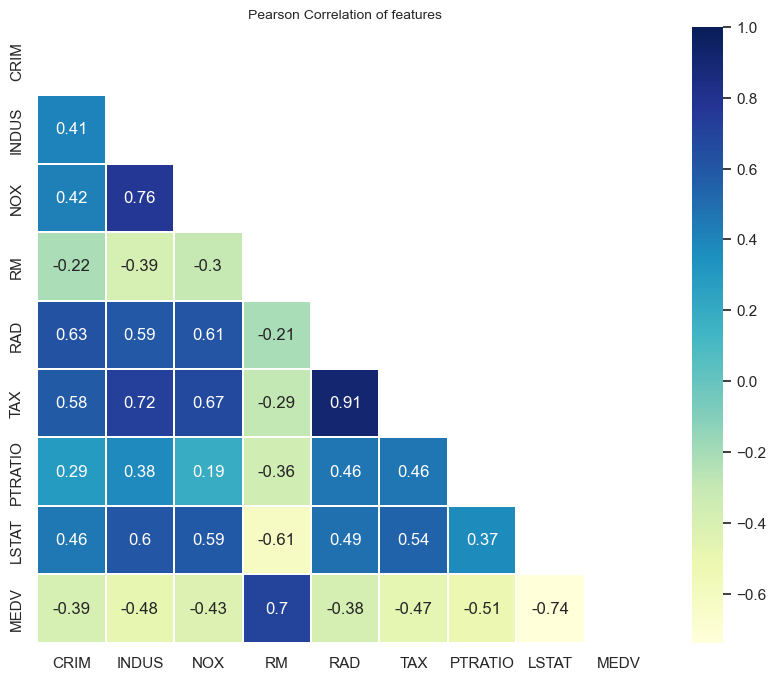

In [19]:
# corr matrix 
CD = data[corr_value.index]
plt.figure(figsize=(10,8))
colormap = plt.cm.YlGnBu

matrix = np.triu(CD.astype(float).corr())
plt.title('Pearson Correlation of features', y=1, size = 10)
sns.heatmap(CD.astype(float).corr(), linewidths=0.1,vmax=1.0, square = True, cmap = colormap, 
           linecolor = 'white', annot = True, mask = matrix)
plt.show()

**Nota:**    
Algunos atributos además estan bien correlacionados entre ellos.
+ INDUS tiene una correlación alta con TAX, NOX y LSTAT.  
+ NOX tiene correlación alta con TAX, correlación media con LSTAT y RM.  
+ RM tiene correlación alta con LSTAT, correlación media con PTRATIO.  
+ TAX tiene correlación media con PTRATIO y LSTAT.  
+ MEDV tiene una correlacion alta con RM y LSTAT, el resto por lógica por encima de +/- 0.4.

Podemos dibujar algunos gráficos de dispersión entre los diferentes atributos para tener una mejor visión, colorearemos estos por objetivo para evaluar si vemos una relación significativa.  Como nuestro atributo dependiente tiene unos valores que van de mínimo 5 hasta máximo 50, según la descripción estadística vista anteriormente, vamos agruapar/cotar/ el atributo en 5 partes.

In [20]:
#bins = [5, 10, 20, 30, 40, 50]
names = ["1", "2", "3", "4", "5"]
# Paso para evitar error:
# bin labels must be one fewer than the number of bin edges python
#Paso 1
CD['MEDV'] = pd.qcut(CD['MEDV'], q=5,duplicates='drop')


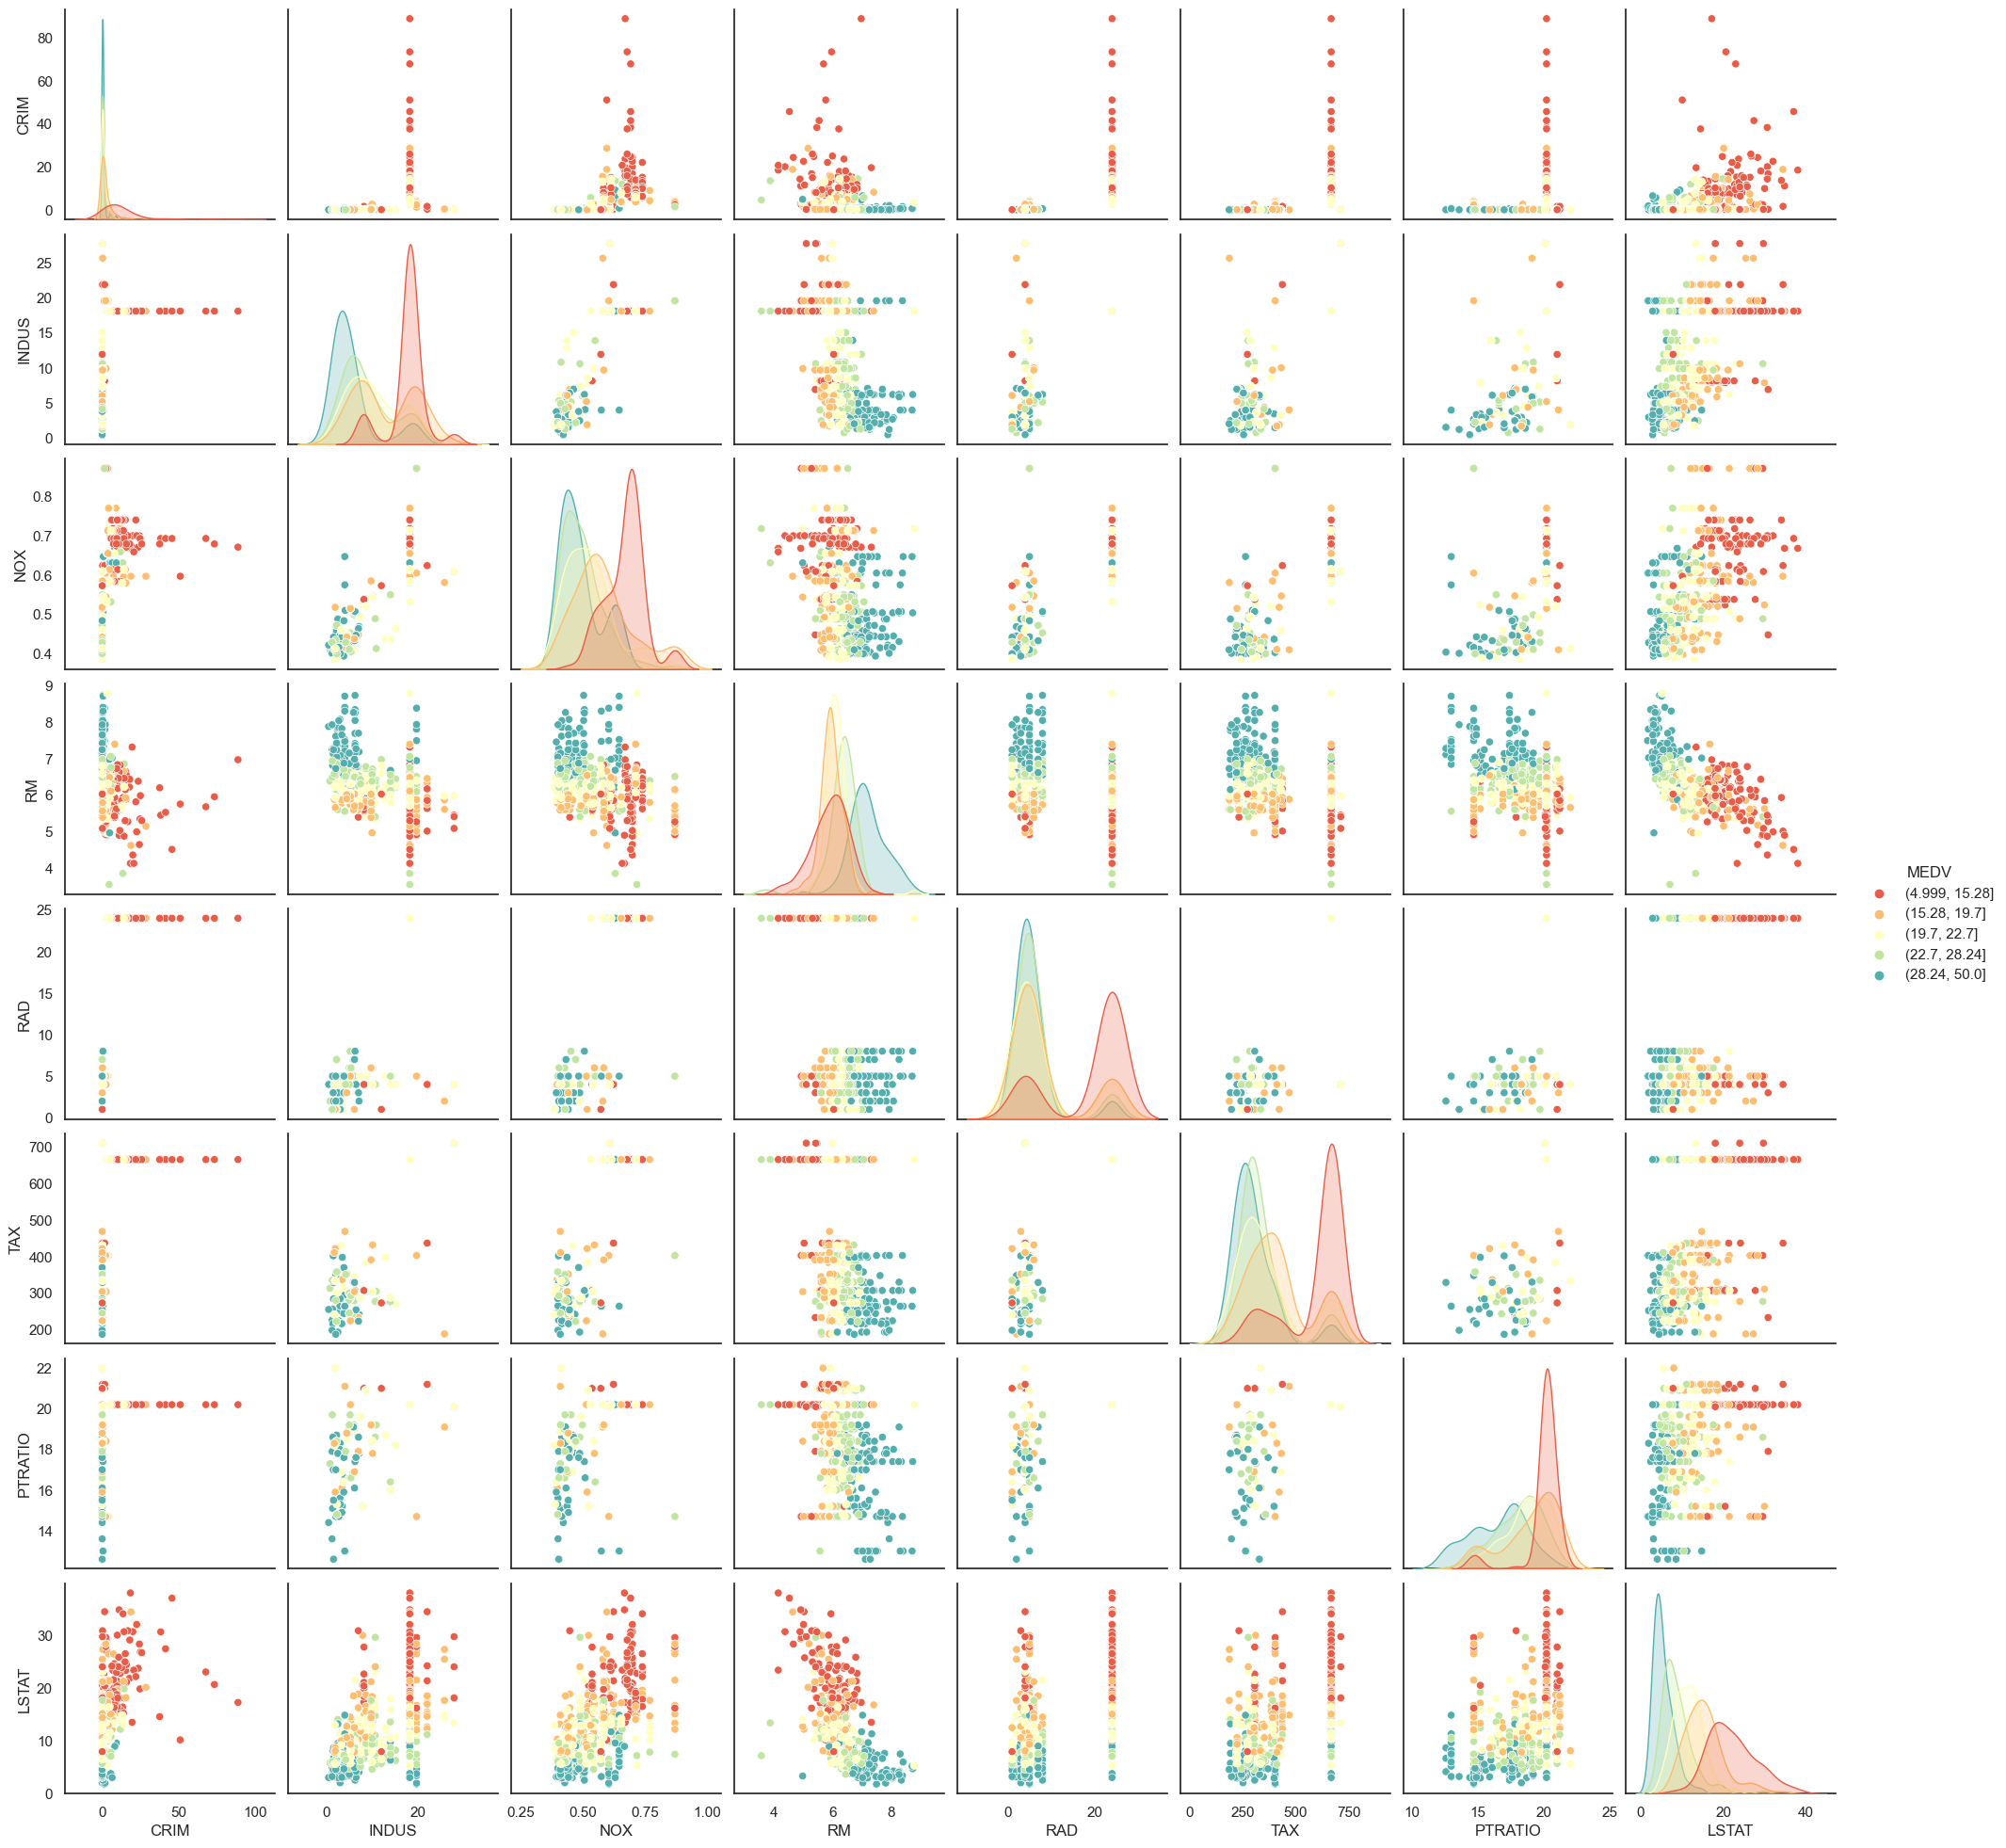

In [21]:
sns.pairplot(CD , hue='MEDV', palette = 'Spectral');

In [22]:
def crearbox(df,columnas):
    fig, axes = plt.subplots(3, 5, figsize=(20, 10))
    index = 0
    axes = axes.flatten()
    
    for idx, (col, ax) in enumerate(zip(columnas, axes.flatten())):
        sns.boxplot(df[columnas].iloc[: , idx], color = colors[idx], ax = ax)
        index += 1
        #print(col[index])
        ax.set_title("Diagrama Boxplot "+ str(col))
        plt.subplots_adjust(wspace=.5, hspace=.5)
    else:
        [ax.set_visible(False) for ax in axes.flatten()[idx+1:]]


- Dectección de Outliers:
 


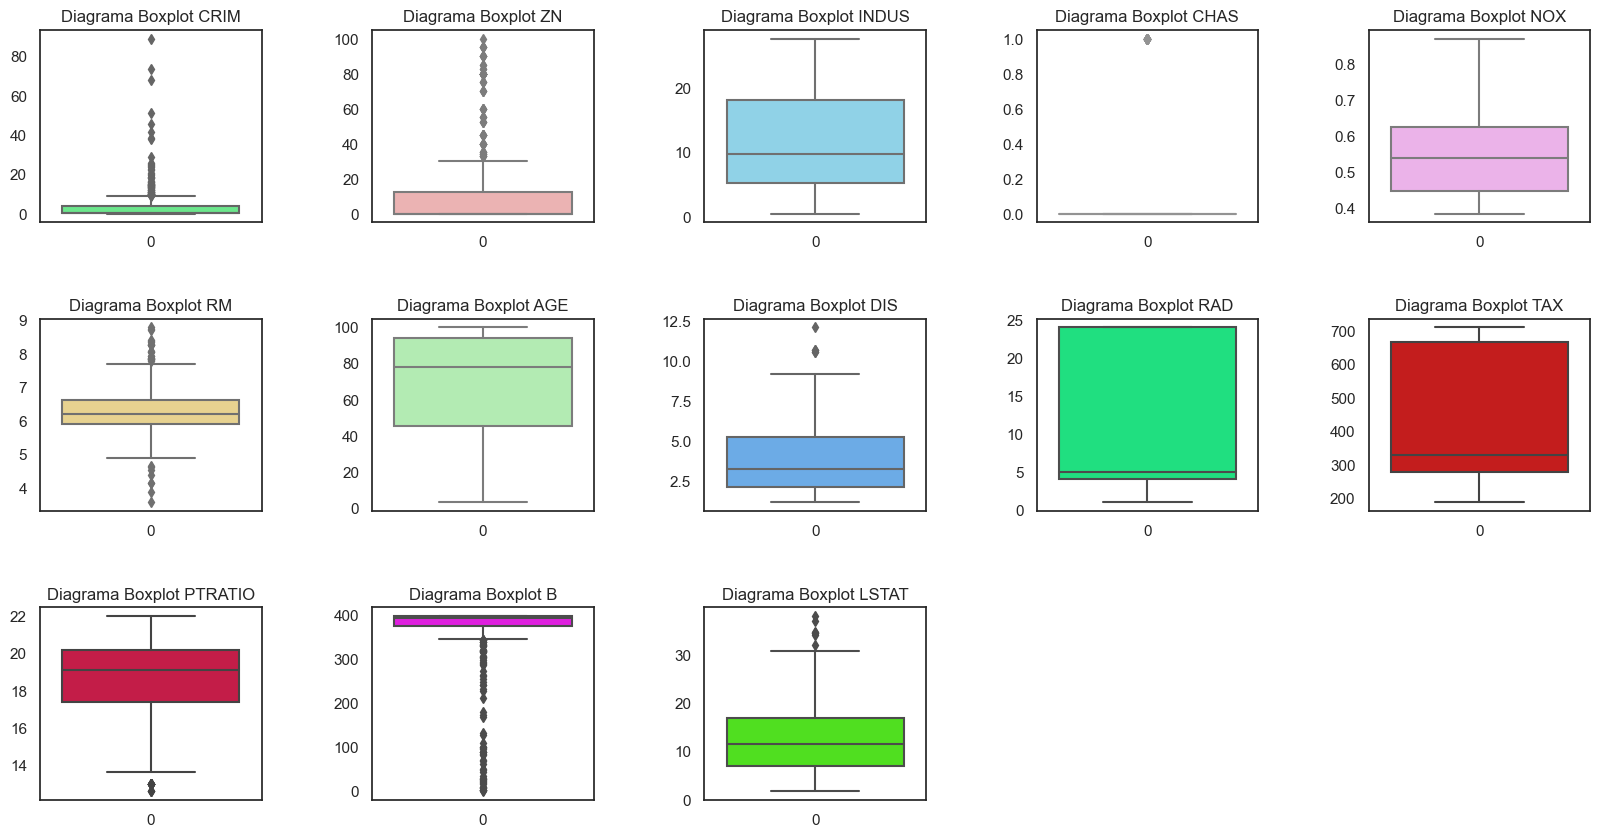

In [23]:
print('\n- Dectección de Outliers:\n ')
crearbox(data,features)
sns.set_theme(style="white", rc=None)

+ **Atributo dependiente 'MEDV'.**

Haremos un pequeño estudio de dicho atributo.

  - Gráfica de Histograma.
  - Gráfico Quantile-Quantile.
  - Prueba Shapiro-Wilks.



- Distribución del Atributo dependiente:
 


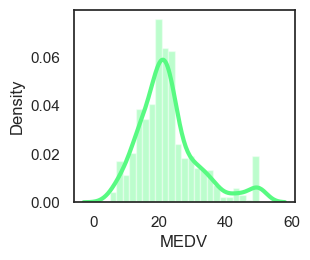

In [24]:
#print(Style.BRIGHT +'\nPruebas de Contraste de Normalidad:\n '+Style.RESET_ALL)
print('\n- Distribución del Atributo dependiente:\n ')
crearhistograma(data,target)
sns.set_theme(style="white", rc=None)


In [25]:
print('\n- Prueba Shapiro-Wilk:\n ')
crearShapiro(data,target)
sns.set_theme(style="white", rc=None)


- Prueba Shapiro-Wilk:
 
Resultado del Test de Hipótesis:


,Atributo,Stat,p-value,Resultado
0,MEDV,0.917152,0.000000,Not Probably Gaussian



- Gráfica Quantile-Quantile:
 


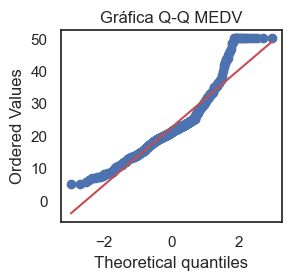

In [26]:
print('\n- Gráfica Quantile-Quantile:\n ')
crearquantile(data,target)
sns.set_theme(style="white", rc=None)


- Dectección de Outliers:
 


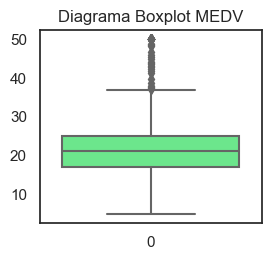

In [27]:
print('\n- Dectección de Outliers:\n ')
crearbox(data,target)
sns.set_theme(style="white", rc=None)

In [28]:
print('- Estadística descriptiva del Atributo Dependiente:\n')
print(data['MEDV'].describe().to_string())
print('median   ',data['MEDV'].median())

- Estadística descriptiva del Atributo Dependiente:

count    505.000000
mean      22.529901
std        9.205991
min        5.000000
25%       17.000000
50%       21.200000
75%       25.000000
max       50.000000
median    21.2


**Nota:**    
Analizando las diferentes gráficas por orden cronológico, la primera gráfica tiene forma de campana, pero con la prueba shapiro-wilk podemos observar que no es una distribución normal.  La gráfica Q-Q vemos que el comportamiento de los elementos bajos y altos no son correctos. Por último la gráfica de Boxplot, nos indica que tenemos outliers en nuestro atributo dependiente.

+ **Preparación de Atributos.**

Lo desarrollamos en el ejercicio 3.

+ **Determinar el Train y Test.**  
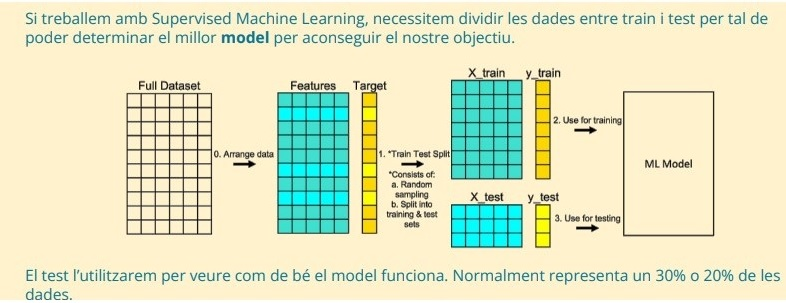

   
****Utilizo los siguientes atributos para realizar el Train/Test.****  
Creamos nuestro dataset de Train y Test:    
- features = Todos los atributos independientes menos el atributo dependiente.
- target = El atributo dependiente MEDV.  

Vamos a utilizar solo los atributos independientes que tienen un coeficiente
de correlación con el atributo dependiente de >0.37.


In [29]:
# Creamos nuestro dataset de Train y Test
# Vamos a utilizar solo los atributos independientes que tienen un coeficiente
# de correlación con el atributo dependiente de >0.37

df00 = data.copy()
features = ['INDUS', 'NOX', 'RM', 'RAD', 'TAX','PTRATIO','LSTAT']
#features = ['RM','LSTAT']
target = ['MEDV']
#features = columnas
#Voy a utilizar los atributos que han tenido un coeficiente de correlación +/- 0.7 y RM que parecia
#una distribución normal

x = df00.loc[:, features]
#target 
y = df00.loc[:, target]
    
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =0.2, 
                                                    random_state = 42) 
# random_state = 42, siempre coge la misma partición


print(Style.BRIGHT +'Estudio del Conjunto de Datos:\n\nResultado:\n '+Style.RESET_ALL) 
print(Fore.GREEN+'Conjunto de Datos Train y Test (x e y):'+Style.RESET_ALL)
print(f'- Total de Registros y atributos, X_train: {X_train.shape}')
print(f'- Total de Registros y atributos, X_test: {X_test.shape}')
print(f'- Total de Registros y atributos, y_train: {y_train.shape}')
print(f'- Total de Registros y atributos, y_test: {y_test.shape}')




Estudio del Conjunto de Datos:

Resultado:
 
Conjunto de Datos Train y Test (x e y):
- Total de Registros y atributos, X_train: (404, 7)
- Total de Registros y atributos, X_test: (101, 7)
- Total de Registros y atributos, y_train: (404, 1)
- Total de Registros y atributos, y_test: (101, 1)


************

### <font color='#d50283'>- Exercici 1</font>
Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.

In [30]:
# Guardar información


def metricas(titulo,df,ytest,prediccion):
    
    r2 = round(r2_score(ytest, prediccion),2)
    mse = round(mean_squared_error(ytest, prediccion),2)
    rmse = round(math.sqrt(mean_squared_error(ytest, prediccion)),2)
    mae = round(mean_absolute_error(ytest, prediccion),2)
    #Guardar
    df.append([titulo, r2, "{} %".format(round(r2*100,2)),mse,rmse,mae])

    return(df)

In [31]:
#Predigo los 5 primeros valores de MEDV (y_test)
def Predicciones(dfp,prediccion):
    Residuos=0
    df_prediccion=[]
    Pred=np.array(prediccion)
    Actual=np.array(dfp)
    print('Comparación y_test y la Predicción:')

    df_prediccion=pd.DataFrame({'Actual':Actual.ravel(),'Pred':Pred.ravel(),'Residuos':Actual.ravel()-Pred.ravel()})
    return(df_prediccion)

#### 1.- Linear Regression.   
Se elegirá el modelo de Regresión Lineal

In [32]:
#Instanciar
lr00 = LinearRegression()

#Entrenar
lr00.fit(X_train,y_train)
# Predicciones
pred_lr00 = lr00.predict(X_test)

dflr00=(Predicciones(y_test,pred_lr00))
print(dflr00[:5])

print("Train:", lr00.score(X_train, y_train))
print("Test:", lr00.score(X_test, y_test))
print("R2: ", r2_score(y_test, pred_lr00))

Comparación y_test y la Predicción:
   Actual       Pred  Residuos
0    22.6  23.822164 -1.222164
1    32.0  32.471744 -0.471744
2    13.6  12.934468  0.665532
3    23.4  25.328173 -1.928173
4    33.4  32.756184  0.643816
Train: 0.6959009672119487
Test: 0.6293943667973505
R2:  0.6293943667973505


In [33]:
# fórmula y=a+bx, Ecuación de una línea recta
# vemos los parámetros que ha estimado la regresión lineal
print('a =', str(lr00.coef_))
# vemos los parámetros que ha estimado la regresión lineal
print('b =', str(lr00.intercept_))
#to_numpy()

a = [[ 0.14731641 -3.68613937  4.77162408  0.23407986 -0.01424961 -0.98896622
  -0.59256512]]
b = [22.3251709]


In [34]:
# Comprobación de predicción y precisión
#Añadir valores ejercicio 2
dfmetricas00=[]
dfmetricas00=metricas('Linear Regression Original',dfmetricas00,y_test,pred_lr00)


#### 2.- Regresión Random Forest.

In [35]:

#rf_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
rf00 = RandomForestRegressor(n_jobs = -1, oob_score = True)
# Entrenar
rf00.fit(X_train,y_train)
# Predicciones
pred_rf00 = rf00.predict(X_test)
# Predicciones
dfrf00=(Predicciones(y_test,pred_rf00))
print(dfrf00[:5])

print("Train: ", rf00.score(X_train, y_train))
print("Test: ", rf00.score(X_test, y_test))
print("R2: ", r2_score(y_test, pred_rf00))


Comparación y_test y la Predicción:
   Actual    Pred  Residuos
0    22.6  20.655     1.945
1    32.0  33.093    -1.093
2    13.6  16.375    -2.775
3    23.4  23.414    -0.014
4    33.4  35.288    -1.888
Train:  0.9779116559257623
Test:  0.8163898797885486
R2:  0.8163898797885486


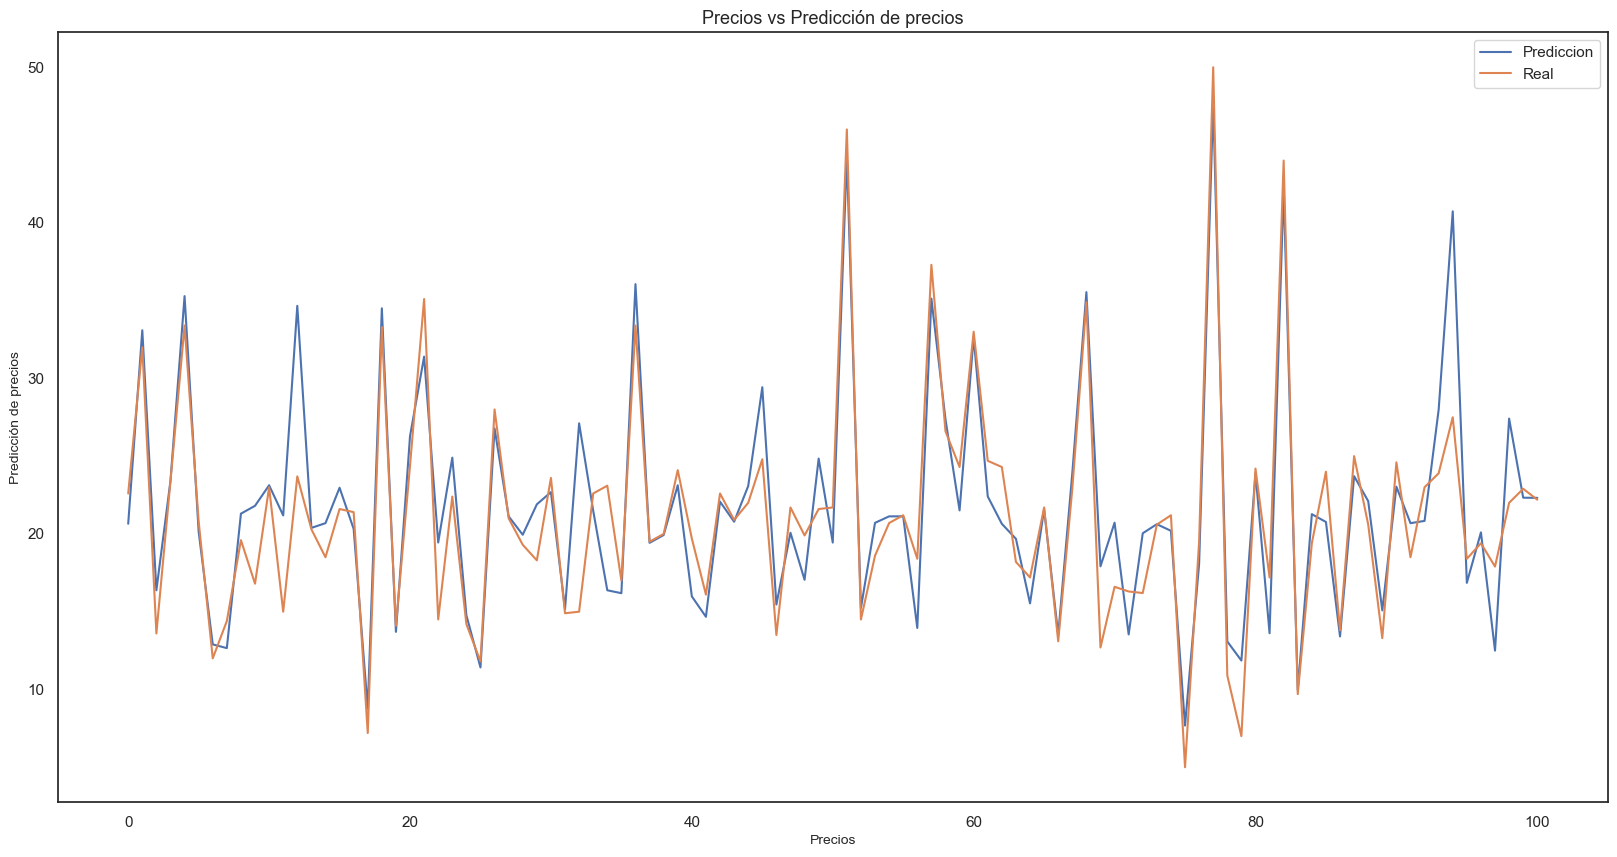

In [36]:
plt.figure(figsize = (20,10))

plt.plot(pred_rf00, label='Prediccion')
plt.plot(y_test.values, label='Real')

plt.legend()
plt.xlabel('Precios',fontsize=10)  
plt.ylabel('Predicción de precios',fontsize=10)
plt.title('Precios vs Predicción de precios',fontsize=13)
plt.show()

In [37]:

#Añadir valores ejercicio 2
dfmetricas00=metricas('Random Forest Original',dfmetricas00,y_test,pred_rf00)



#### 3. Ridge.

In [38]:
from sklearn.linear_model import Ridge
Ridge00=Ridge()
Ridge00.fit(X_train,y_train)
# Predicciones
pred_Ridge00 = Ridge00.predict(X_test)
dfRidge00=(Predicciones(y_test,pred_Ridge00))
print(dfRidge00[:5])
print("Train:", Ridge00.score(X_train, y_train))
print("Test:", Ridge00.score(X_test, y_test))
print("R2: ", r2_score(y_test, pred_Ridge00))

Comparación y_test y la Predicción:
   Actual       Pred  Residuos
0    22.6  23.890004 -1.290004
1    32.0  32.447654 -0.447654
2    13.6  12.786780  0.813220
3    23.4  25.216450 -1.816450
4    33.4  32.773248  0.626752
Train: 0.6958088044167208
Test: 0.6279302931561856
R2:  0.6279302931561856


In [39]:
#Añadir valores ejercicio 2
dfmetricas00=metricas('Ridge Original',dfmetricas00,y_test,pred_Ridge00)


#### 4. Lasso.

In [40]:
from sklearn.linear_model import Lasso
Lasso00=Lasso(alpha=0.1)
Lasso00.fit(X_train,y_train)
# predicción
pred_Lasso00=Lasso00.predict(X_test) # predicción
# Predicciones
dfLasso00=(Predicciones(y_test,pred_Lasso00))
print(dfLasso00[:5])
print("Train:", Lasso00.score(X_train, y_train))
print("Test:", Lasso00.score(X_test, y_test))
print("R2: ", r2_score(y_test, pred_Lasso00))

Comparación y_test y la Predicción:
   Actual       Pred  Residuos
0    22.6  24.132079 -1.532079
1    32.0  32.378519 -0.378519
2    13.6  12.608320  0.991680
3    23.4  25.081794 -1.681794
4    33.4  32.659135  0.740865
Train: 0.694924239488862
Test: 0.6292023117641692
R2:  0.6292023117641692


In [41]:
#Añadir valores ejercicio 2
dfmetricas00=metricas('Lasso Original',dfmetricas00,y_test,pred_Lasso00)


#### 5. Arbol decisión.

In [42]:
from sklearn.tree import DecisionTreeRegressor
DecTree00 = DecisionTreeRegressor(max_depth=4, random_state=42)
DecTree00.fit(X_train, y_train);

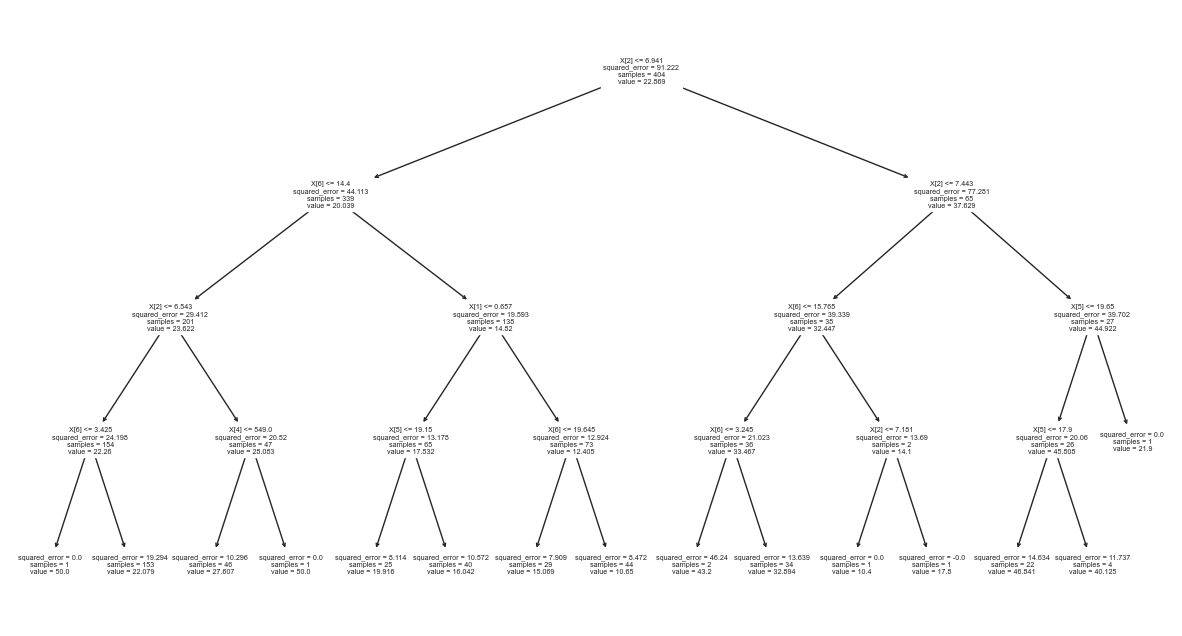

In [43]:
from sklearn import tree

plt.figure(figsize =(15, 8))
tree.plot_tree(DecTree00);

In [44]:
pred_DecTree00 = DecTree00.predict(X_test) # predición
# Predicciones
dfDecTree00=(Predicciones(y_test,pred_DecTree00))
print(dfDecTree00[:5])
print("Train:", DecTree00.score(X_train, y_train))
print("Test:", DecTree00.score(X_test, y_test))
print("R2: ", r2_score(y_test, pred_DecTree00))

Comparación y_test y la Predicción:
   Actual       Pred  Residuos
0    22.6  22.079085  0.520915
1    32.0  27.606522  4.393478
2    13.6  16.042500 -2.442500
3    23.4  22.079085  1.320915
4    33.4  32.894118  0.505882
Train: 0.8486284319665672
Test: 0.6263127601350725
R2:  0.6263127601350725


In [45]:
#Añadir valores ejercicio 2
dfmetricas00=metricas('Arbol decisión Original',dfmetricas00,y_test,pred_DecTree00)


#### 6. Multiple Linear Regression (MLR).

In [46]:
import statsmodels.api as sm

sm00= sm.OLS(y_train, X_train).fit()
pred_sm00 = sm00.predict(X_test)
sm00.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              1146.
Date:                Wed, 22 Feb 2023   Prob (F-statistic):                   7.92e-259
Time:                        15:36:50   Log-Likelihood:                         -1253.2
No. Observations:                 404   AIC:                                      2520.
Df Residuals:                     397   BIC:                                      2548.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
INDUS          0.0739      0.070      1.050      0.294      -0.064       0.212
NOX            3.5197      3.707      0.949      0.343      -3.768      10.807
RM             6.3063      0.333     18.913      0.000       5.651       6.962
RAD            0.0877      0.074      1.182      0.238      -0.058       0.234
TAX           -0.0101      0.005     -2.235      0.026      -0.019      -0.001
PTRATIO       -0.5360      0.110     -4.895      0.000      -0.751      -0.321
LSTAT         -0.5304      0.057     -9.252      0.000      -0.643      -0.418
==============================================================================
Omnibus:                      179.318   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1198.473
Skew:                           1.763   Prob(JB):                    5.69e-261
Kurtosis:                      10.665   Cond. No.                     6.11e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Nota:**

Podemos ver aquí que este modelo tiene un valor de  𝑅2 alto: 0.953, lo que significa que este modelo explica el 95.3 % de la varianza de nuestra variable dependiente.

Podemos ver que tanto RM como LSTAT son estadísticamente significativos para predecir (o estimar) el valor medio de la casa; Vemos que a medida que RM aumenta en 1, MEDV aumentará en 6,3.63 y cuando LSTAT aumente en 1, MEDV disminuirá en -0,5304.

LSTAT es el porcentaje de estatus más bajo de la población y, lamentablemente, podemos esperar que reduzca el valor medio de las casas. Con esta misma lógica, cuantas más habitaciones tenga una casa, normalmente mayor será su valor.

In [47]:
#Predicciones
dfsm00=(Predicciones(y_test,pred_sm00))
print(dfsm00[:5])

Comparación y_test y la Predicción:
   Actual       Pred  Residuos
0    22.6  22.485560  0.114440
1    32.0  32.045188 -0.045188
2    13.6  14.747487 -1.147487
3    23.4  24.619768 -1.219768
4    33.4  33.695716 -0.295716


In [48]:
#print("Train:", DecTree_model.score(X_train, y_train))
print("Test:", round(sm00.rsquared,2))
r2_score(y_test, pred_sm00)

Test: 0.95


0.5706856611641594

In [49]:
#Añadir valores ejercicio 2
dfmetricas00=metricas('Multiple Linear Regression (MLR) Original',dfmetricas00,y_test,pred_sm00)


In [88]:
def EstudioResiduals(titulo,df):
    print(f'\nEstudio de los residuos del modelo {titulo}:\n ')
    print('\n- Prueba Shapiro-Wilk:\n ')
    crearShapiro(df,['Residuos'])
    sns.set_theme(style="white", rc=None)
    
    print('\n- Diferentes Gráficas:\n ')
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

    sns.regplot(x='Actual', y='Pred', data=df, marker='.', scatter_kws={'s': 50},ax=axes[0,0])
    axes[0, 0].set_title('(Gr-1): Valor Real vs valor predicho', fontsize = 10, fontweight = "bold")
    axes[0, 0].set_xlabel('Real')
    axes[0, 0].set_ylabel('Predicción')
    

    sns.residplot(x="Actual", y="Pred", data=df, scatter_kws={"s": 80},ax=axes[0,1]
              ,lowess=True, line_kws=dict(color="r"))
    axes[0, 1].set_title('(Gr-2): Residuos del modelo', fontsize = 10, fontweight = "bold")
    axes[0, 1].set_ylabel('Residuos')
    axes[0, 1].set_xlabel('Fitted Value')
    
    sns.distplot(df['Residuos'], color = 'Blue', ax = axes[1,0], kde_kws=dict(linewidth=3))
    axes[1, 0].set_title('(Gr-3): Distribución residuos del modelo', fontsize = 10,fontweight = "bold")
    
    ax=sm.qqplot(df['Residuos'], line='q',ax = axes[1,1])
    axes[1, 1].set_title('(Gr-4): Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
    

    

#### Estudio de los Residuos de los Métodos utilizados.

Los Residuos deben cumplir las siguientes condiciones:   
+ Linealidad, La relación entre las variables debe ser lineal.
+ Homocedaticidad, los errores tienen una varianza constante.
+ Normalidad, los errores están distribuidos normalmente.
+ Independencia, los errores son independientes.

Residual = Valor observado – Valor previsto

Los DataSet que contienen la información para realizar el estudio de Residuos:

|DataSet de Residuos, datos para la función|  
| -: |    
    
| Titulo | DataSet Original|   
| :- | -: |   
| Linear Regression | dflr00 |   
| Random Forest | dfrf00 |   
| Ridge | dfRidge00 |   
| Lasso | dfLasso00 | 
| Arbol decisión | dfDecTree00 |   
| Multiple Linear Regression (MLR) | dfsm00 |   



Estudio de los residuos del modelo Random Forest Original:
 

- Prueba Shapiro-Wilk:
 
Resultado del Test de Hipótesis:


,Atributo,Stat,p-value,Resultado
0,Residuos,0.909023,0.000003,Not Probably Gaussian



- Diferentes Gráficas:
 


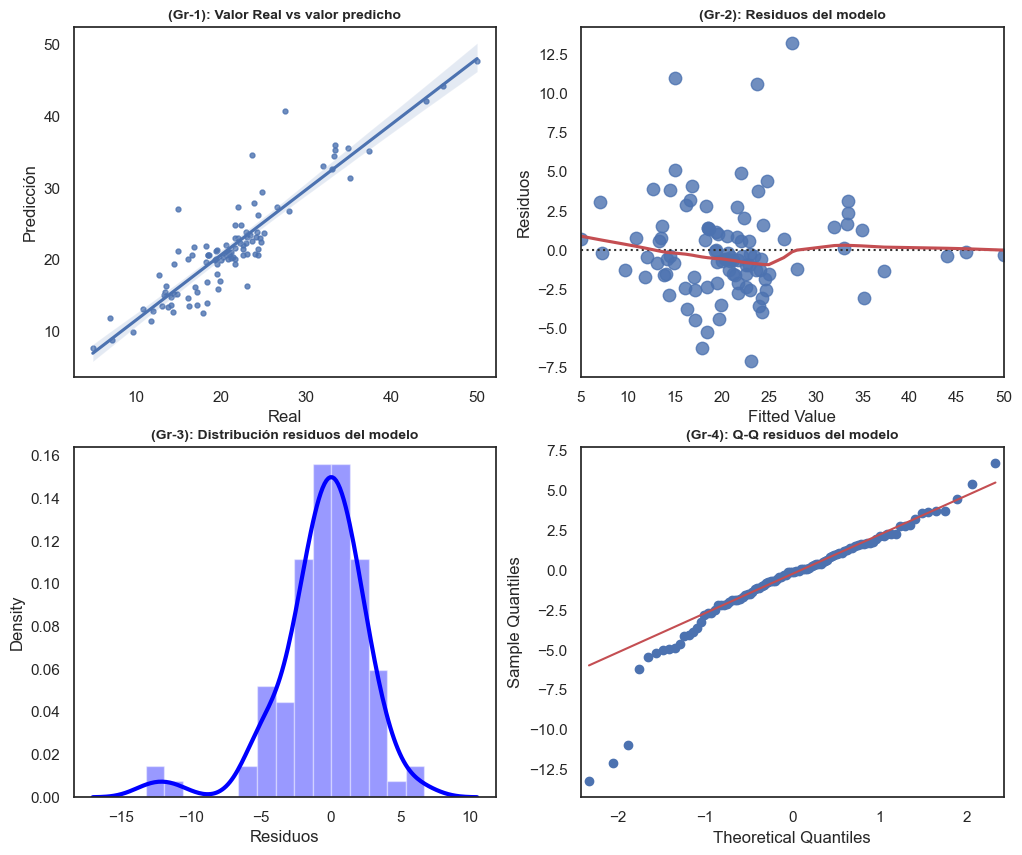

In [89]:
# Parámetro función
#EstudioResiduals('titulo',DataSet)
EstudioResiduals('Random Forest Original',dfrf00)

Realizando un estudio de todos los DataSet observamos el mismo comportamiento, no cumple ninguno de los requisitos comentados anteriormente.  
Otra forma de realizar el estudio de los residuos de los diferentes modelos sería por sus ***estadísticos***.
Para el estudio del método estadístico añado el link, <font color='##08a22a'></font>[Multiple linear Regresión (MLR)](<https://www.statsmodels.org/stable/examples/notebooks/generated/regression_diagnostics.html?highlight=residual>).

In [52]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(dfsm00['Residuos'])
lzip(name, test)

[('Jarque-Bera', 110.15007596953059),
 ('Chi^2 two-tail prob.', 1.2056324054705563e-24),
 ('Skew', 1.4995601171093405),
 ('Kurtosis', 7.144822468889149)]

************

### <font color='#d50283'>- Exercici 2</font>
Compara’ls en base al MSE i al R2.

In [53]:
#columnas = ['R²','% R²','mse','rmse','mae']
metricasdf00 = pd.DataFrame(dfmetricas00,columns=['Tipo Regresión','R²','% R²','mse','rmse','mae'])
metricasdf00

,Tipo Regresión,R²,% R²,mse,rmse,mae
0,Linear Regression Original,0.63,63.0 %,20.65,4.54,3.26
1,Random Forest Original,0.82,82.0 %,10.23,3.20,2.20
2,Ridge Original,0.63,63.0 %,20.73,4.55,3.26
3,Lasso Original,0.63,63.0 %,20.66,4.55,3.27
4,Arbol decisión Original,0.63,63.0 %,20.82,4.56,2.91
5,Multiple Linear Regression (MLR) Original,0.57,57.0 %,23.92,4.89,3.40


************

### <font color='#d50283'>- Exercici 3</font>
Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.

1- El atributo CHAS al ser un dummie ya está lista para un entrenamiento de Machine learning por lo que no se realizará ninguna transformación.  
2- Los atributos que tienen outliers (CRIM, ZN, RM, DIS, PTRATIO, B, LSTAT), se puede utilizar RobustScaler.  
3- Los atributos que no tienen una distribución normal (INDUS, NOX, AGE, RAD, TAX), se puede realizar una normalización (MinMax) .   
4- Se realizará una copia de DataFrame para poder realizar la transformación de los datos.   
 

In [54]:
df01 = data.copy()

1. Utilizamos RobustScaler para todos los atributos.

+ **Realizamos la estandarización de los atributos.**

In [55]:
columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

# Transformamos 
Robus = RobustScaler()
# transform data
df01 = Robus.fit_transform(df01)
# converteixo l'array en DataFrame
df01 = pd.DataFrame(df01, columns=columns)
# mostro resultat
df01.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.064471,0.0,-0.202943,0.0,-0.394286,0.287838,0.024440,0.568110,-0.15,-0.22739,-0.464286,0.261973,-0.225126,0.0500
1,-0.064477,0.0,-0.202943,0.0,-0.394286,1.320270,-0.338086,0.568110,-0.15,-0.22739,-0.464286,0.067050,-0.738693,1.6875
2,-0.063064,0.0,-0.581720,0.0,-0.457143,1.067568,-0.649695,0.920017,-0.10,-0.27907,-0.142857,0.153257,-0.848241,1.5250
3,-0.052864,0.0,-0.581720,0.0,-0.457143,1.268919,-0.478615,0.920017,-0.10,-0.27907,-0.142857,0.261973,-0.608040,1.8750
4,-0.063765,0.0,-0.581720,0.0,-0.457143,0.300000,-0.386965,0.920017,-0.10,-0.27907,-0.142857,0.128831,-0.620101,0.9375


+ **Creamos atributos dependientes e independientes.**

In [56]:
features = ['INDUS', 'NOX', 'RM', 'RAD', 'TAX','PTRATIO','LSTAT']
#features = ['RM','LSTAT']
target = ['MEDV']
#features = columnas
#Voy a utilizar los atributos que han tenido un coeficiente de correlación +/- 0.7 y RM que parecia
#una distribución normal

x1 = df01.loc[:, features]
#target 
y1 = df01.loc[:, target]




+ **Creamos el nuevo conjunto de entrenamiento y test.**

In [57]:
X_train_rb, X_test_rb, y_train_rb, y_test_rb = train_test_split(x1, y1, test_size = 0.2, random_state = 42)
print(X_train_rb.shape); print(X_test_rb.shape)

(404, 7)
(101, 7)


+ **Random Forest.**

In [58]:

rf01 = RandomForestRegressor(n_estimators = 10, random_state = 42)
#rf01 = RandomForestRegressor(n_jobs = -1, oob_score = True)
# Entrenar
rf01.fit(X_train_rb,y_train_rb)
# Predicciones
pred_rf01 = rf01.predict(X_test_rb)
# Predicciones
dfrf01=(Predicciones(y_test_rb,pred_rf01 ))
print(dfrf01[:5])

print("Train: ", rf01.score(X_train_rb, y_train_rb))
print("Test: ", rf01.score(X_test_rb, y_test_rb))
print("R2: ", r2_score(y_test_rb, pred_rf01 ))

#Añadir valores ejercicio 2
dfmetricas01=[]
dfmetricas01=metricas('Random Forest RobustScaler',dfmetricas01,y_test_rb,pred_rf01)

Comparación y_test y la Predicción:
   Actual     Pred  Residuos
0   0.175 -0.00375   0.17875
1   1.350  1.62625  -0.27625
2  -0.950 -0.41500  -0.53500
3   0.275  0.33625  -0.06125
4   1.525  1.55875  -0.03375
Train:  0.9623990070484925
Test:  0.8088725685922065
R2:  0.8088725685922065


In [59]:
#columnas = ['R²','% R²','mse','rmse','mae']
print('\nMétricas ejercicio 1 (Antes de la estandarización):')
antes=metricasdf00[metricasdf00['Tipo Regresión']=='Random Forest Original']
display(antes)
print('\nMétricas ejercicio 3 (Después de la estandarización):')
dfmetricas01 = pd.DataFrame(dfmetricas01,columns=['Tipo Regresión','R²','% R²','mse','rmse','mae'])
dfmetricas01 



Métricas ejercicio 1 (Antes de la estandarización):


,Tipo Regresión,R²,% R²,mse,rmse,mae
1,Random Forest Original,0.82,82.0 %,10.23,3.2,2.2



Métricas ejercicio 3 (Después de la estandarización):


,Tipo Regresión,R²,% R²,mse,rmse,mae
0,Random Forest RobustScaler,0.81,81.0 %,0.17,0.41,0.3



Estudio de los residuos del modelo Random Forest RobustScaler:
 

- Prueba Shapiro-Wilk:
 
Resultado del Test de Hipótesis:


,Atributo,Stat,p-value,Resultado
0,Residuos,0.954982,0.001681,Not Probably Gaussian



- Diferentes Gráficas:
 


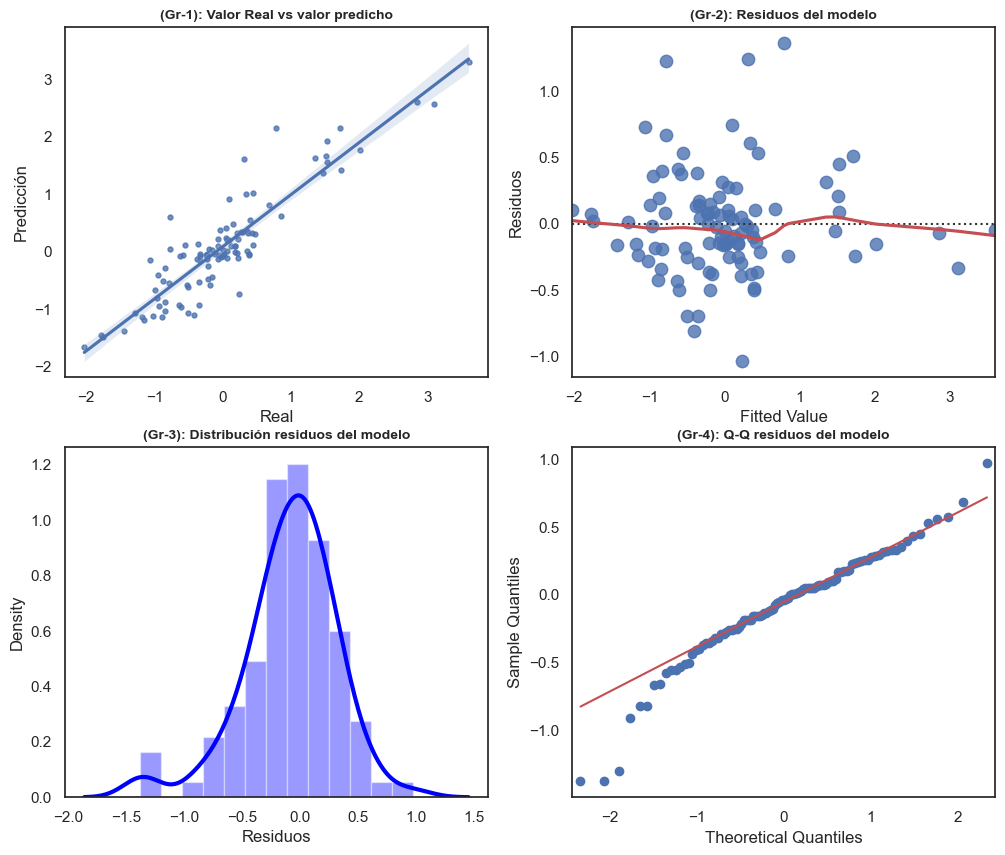

In [90]:
EstudioResiduals('Random Forest RobustScaler',dfrf01)

Nota:    
Después de la estandarización observamos un cambio en el comportamiento de los residuos, la prueba Shapiro-Wilk nos dice que es 'Not Probably Gaussian'.


In [61]:
# parámetros que utilizamos:
rf01.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [62]:

# Utilizamos RandomizedSearch para mejorar los parámetros
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num=10)]
# número de features a considerar a cada división
max_features = ['auto', 'sqrt']
# número máximo de nivels del arbol
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# número de muestra requeridas para dividir el nodo
min_samples_split = [2,5,10]
# número mínimo de muestras
min_samples_leaf = [1,2,4]
# método de selección de muestras para entrenar cada arbol
bootstrap = [True, False]
# creamos la red aleatoria
random_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'bootstrap' : bootstrap}
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [63]:
# mejores parámetros
# 
rf_random = RandomizedSearchCV(
                            estimator = rf01
                            ,param_distributions = random_grid
                            ,n_iter = 100
                            ,cv = 5
                            ,verbose = 2
                            ,random_state = 42
                            ,scoring='neg_mean_absolute_error'
                            ,n_jobs = -1)
rf_random.fit(X_train_rb, y_train_rb)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=10,
                                                   random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [64]:
#estos son los mejores parámetros
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

In [65]:
#rf_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
rf02 = RandomForestRegressor(n_estimators = 1000,
                           min_samples_split = 2,
                           min_samples_leaf = 1,
                           max_features = 'sqrt',
                           max_depth = 110,
                           bootstrap = True)
# Entrenar
rf02.fit(X_train_rb,y_train_rb)
# Predicciones
pred_rf02 = rf02.predict(X_test_rb)
# Predicciones
dfrf02=(Predicciones(y_test_rb,pred_rf02))
print(dfrf02[:5])

print("Train: ", rf02.score(X_train_rb, y_train_rb))
print("Test: ", rf02.score(X_test_rb, y_test_rb))
print("R2: ", r2_score(y_test_rb, pred_rf02 ))

#Añadir valores ejercicio 2
#dfestmet=[]
a=[]
a=metricas('Random Forest Best',a,y_test_rb,pred_rf02)

Comparación y_test y la Predicción:
   Actual      Pred  Residuos
0   0.175  0.139500  0.035500
1   1.350  1.447975 -0.097975
2  -0.950 -0.608363 -0.341637
3   0.275  0.254600  0.020400
4   1.525  1.729637 -0.204637
Train:  0.98147909074917
Test:  0.8941730399677014
R2:  0.8941730399677014


In [66]:
dfmetricas01=dfmetricas01.append(pd.DataFrame(a,columns=['Tipo Regresión','R²','% R²','mse','rmse','mae']))
dfmetricas01

,Tipo Regresión,R²,% R²,mse,rmse,mae
0,Random Forest RobustScaler,0.81,81.0 %,0.17,0.41,0.30
0,Random Forest Best,0.89,89.0 %,0.09,0.30,0.23


In [67]:
b=metricasdf00[metricasdf00['Tipo Regresión']=='Random Forest Original']


In [68]:
dfmetricas01=dfmetricas01.append(pd.DataFrame(b,columns=['Tipo Regresión','R²','% R²','mse','rmse','mae']))
dfmetricas01

,Tipo Regresión,R²,% R²,mse,rmse,mae
0,Random Forest RobustScaler,0.81,81.0 %,0.17,0.41,0.30
0,Random Forest Best,0.89,89.0 %,0.09,0.30,0.23
1,Random Forest Original,0.82,82.0 %,10.23,3.20,2.20


+ **Linear Regression.**

In [69]:
#Instanciar
lr01 = LinearRegression()

#Entrenar
lr01.fit(X_train_rb,y_train_rb)
# Predicciones
pred_lr01 = lr01.predict(X_test_rb)

dflr01=(Predicciones(y_test_rb,pred_lr01))
print(dflr01[:5])

print("Train:", lr01.score(X_train_rb, y_train_rb))
print("Test:", lr01.score(X_test_rb, y_test_rb))
print("R2: ", r2_score(y_test_rb, pred_lr01))
dfmetricas02=[]
dfmetricas02=metricas('Linear Regression RobustScaler',dfmetricas02,y_test_rb,pred_lr01)


Comparación y_test y la Predicción:
   Actual      Pred  Residuos
0   0.175  0.327770 -0.152770
1   1.350  1.408968 -0.058968
2  -0.950 -1.033192  0.083192
3   0.275  0.516022 -0.241022
4   1.525  1.444523  0.080477
Train: 0.6959009672119487
Test: 0.6293943667973498
R2:  0.6293943667973498


In [70]:
#columnas = ['R²','% R²','mse','rmse','mae']
print('\nMétricas ejercicio 1 (Antes de la estandarización):')
antes=metricasdf00[metricasdf00['Tipo Regresión']=='Linear Regression Original']
display(antes)
print('\nMétricas ejercicio 3 (Después de la estandarización):')
dfmetricas02 = pd.DataFrame(dfmetricas02,columns=['Tipo Regresión','R²','% R²','mse','rmse','mae'])
dfmetricas02



Métricas ejercicio 1 (Antes de la estandarización):


,Tipo Regresión,R²,% R²,mse,rmse,mae
0,Linear Regression Original,0.63,63.0 %,20.65,4.54,3.26



Métricas ejercicio 3 (Después de la estandarización):


,Tipo Regresión,R²,% R²,mse,rmse,mae
0,Linear Regression RobustScaler,0.63,63.0 %,0.32,0.57,0.41



Estudio de los residuos del modelo Linear Regression RobustScaler:
 

- Prueba Shapiro-Wilk:
 
Resultado del Test de Hipótesis:


,Atributo,Stat,p-value,Resultado
0,Residuos,0.893754,0.000001,Not Probably Gaussian



- Diferentes Gráficas:
 


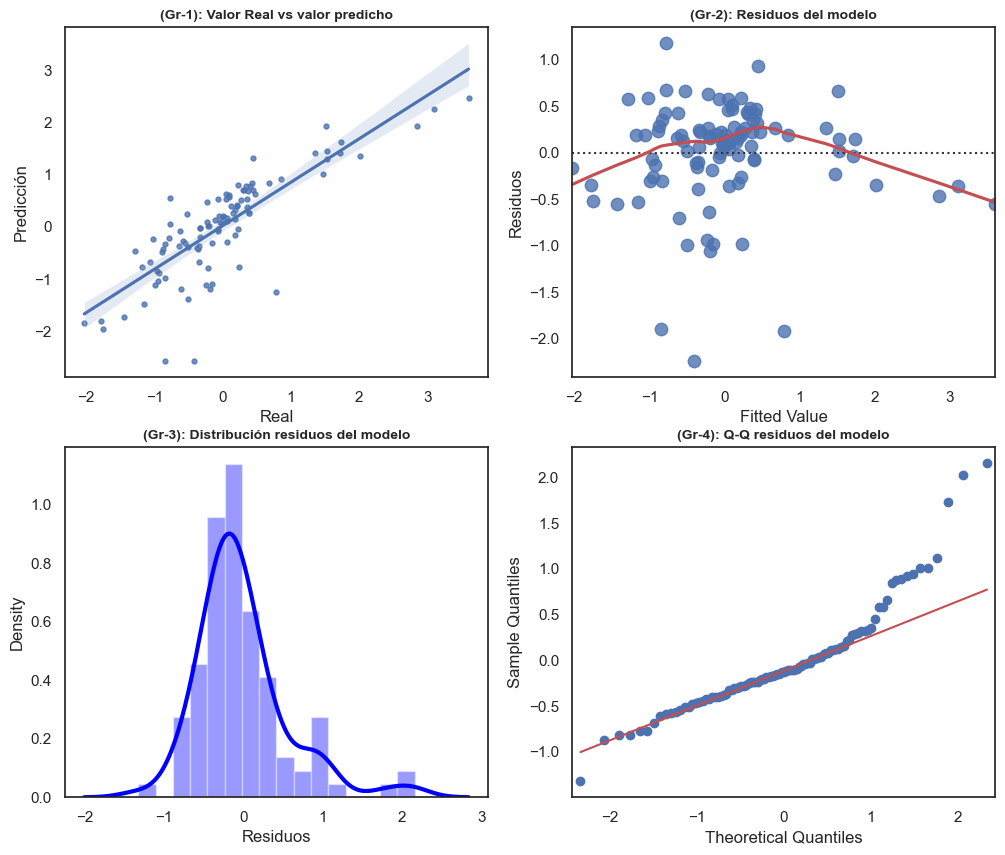

In [91]:
EstudioResiduals('Linear Regression RobustScaler',dflr01)

In [72]:
#parametros de linear Regression
lr01.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [73]:
#Parameter search
from sklearn.model_selection import GridSearchCV

# lista de diccionarios, con nombres de parámetros (str)
param_grid = dict()
param_grid['copy_X'] = [True, False]
param_grid['fit_intercept'] = [True, False]
param_grid['positive'] = [True, False]

search = GridSearchCV(lr01, param_grid)

result = search.fit(X_train_rb, y_train_rb)

print('Mejores Hyperparametros:', result.best_params_)

Mejores Hyperparametros: {'copy_X': True, 'fit_intercept': True, 'positive': False}


In [74]:
lr02 = LinearRegression(copy_X= True, fit_intercept= True, positive= False)
lr02.fit(X_train_rb,y_train_rb)

# make predictions
pred_lr02  = lr02.predict(X_test_rb)

# Predicciones
dflr02=(Predicciones(y_test_rb,pred_lr02))
print(dflr02[:5])

print("Train: ", lr02.score(X_train_rb, y_train_rb))
print("Test: ", lr02.score(X_test_rb, y_test_rb))
print("R2: ", r2_score(y_test_rb, pred_lr02 ))

#Añadir valores ejercicio 2
#dfestmet=[]
lra=[]
lra=metricas('Linear Regression RobustScaler Best',lra,y_test_rb,pred_lr02)

Comparación y_test y la Predicción:
   Actual      Pred  Residuos
0   0.175  0.327770 -0.152770
1   1.350  1.408968 -0.058968
2  -0.950 -1.033192  0.083192
3   0.275  0.516022 -0.241022
4   1.525  1.444523  0.080477
Train:  0.6959009672119487
Test:  0.6293943667973498
R2:  0.6293943667973498


In [75]:
dfmetricas02=dfmetricas02.append(pd.DataFrame(lra,columns=['Tipo Regresión','R²','% R²','mse','rmse','mae']))
dfmetricas02

,Tipo Regresión,R²,% R²,mse,rmse,mae
0,Linear Regression RobustScaler,0.63,63.0 %,0.32,0.57,0.41
0,Linear Regression RobustScaler Best,0.63,63.0 %,0.32,0.57,0.41


In [76]:
c=metricasdf00[metricasdf00['Tipo Regresión']=='Linear Regression Original']

In [77]:
dfmetricas02=dfmetricas02.append(pd.DataFrame(c,columns=['Tipo Regresión','R²','% R²','mse','rmse','mae']))
dfmetricas02

,Tipo Regresión,R²,% R²,mse,rmse,mae
0,Linear Regression RobustScaler,0.63,63.0 %,0.32,0.57,0.41
0,Linear Regression RobustScaler Best,0.63,63.0 %,0.32,0.57,0.41
0,Linear Regression Original,0.63,63.0 %,20.65,4.54,3.26


************

### <font color='#d50283'>- Exercici 4</font>
Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).

+ **Cross validation**

***Random Forest***

In [78]:
from sklearn.model_selection import cross_val_score

cv_rf01 = cross_val_score(rf01, x1, y1, cv=7, scoring='r2')
cv_rf02 = cross_val_score(rf02, x1, y1, cv=7, scoring='r2')
cv_rf00 = cross_val_score(rf00, x, y, cv=7, scoring='r2')

In [79]:
cv_mean = [cv_rf01.mean(), cv_rf02.mean(), cv_rf00.mean()]
dfmetricas01['R2 con Cross Validation'] = cv_mean
dfmetricas01.head()

dfmetricas01.head()

,Tipo Regresión,R²,% R²,mse,rmse,mae,R2 con Cross Validation
0,Random Forest RobustScaler,0.81,81.0 %,0.17,0.41,0.30,0.579606
0,Random Forest Best,0.89,89.0 %,0.09,0.30,0.23,0.637917
1,Random Forest Original,0.82,82.0 %,10.23,3.20,2.20,0.594293


***Linear Regression***

In [80]:
cv_lr01 = cross_val_score(lr01, x1, y1, cv=7, scoring='r2')
cv_lr02 = cross_val_score(lr02, x1, y1, cv=7, scoring='r2')
cv_lr00 = cross_val_score(lr00, x, y, cv=7, scoring='r2')

In [81]:
cv_mean = [cv_lr01.mean(), cv_lr02.mean(), cv_lr00.mean()]
dfmetricas02['R2 con Cross Validation'] = cv_mean
dfmetricas02.head()

dfmetricas02.head()

,Tipo Regresión,R²,% R²,mse,rmse,mae,R2 con Cross Validation
0,Linear Regression RobustScaler,0.63,63.0 %,0.32,0.57,0.41,0.388383
0,Linear Regression RobustScaler Best,0.63,63.0 %,0.32,0.57,0.41,0.388383
0,Linear Regression Original,0.63,63.0 %,20.65,4.54,3.26,0.388383


************

### <font color='#d50283'>- Exercici 5</font>
No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.

In [82]:
features = ['INDUS', 'NOX', 'RAD', 'TAX','PTRATIO','LSTAT']
#features = ['RM','LSTAT']
target = ['MEDV']
#features = columnas
#Voy a utilizar los atributos que han tenido un coeficiente de correlación +/- 0.7 y RM que parecia
#una distribución normal

x2 = df01.loc[:, features]
#target 
y2 = df01.loc[:, target]

X_train_rb2, X_test_rb2, y_train_rb2, y_test_rb2 = train_test_split(x2, y2, test_size = 0.2, random_state = 42)
print(X_train_rb2.shape); print(X_test_rb2.shape)

(404, 6)
(101, 6)


In [83]:

#rf_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
rf03 = RandomForestRegressor(n_jobs = -1, oob_score = True)
# Entrenar
rf03.fit(X_train_rb2,y_train_rb2)
# Predicciones
pred_rf03 = rf03.predict(X_test_rb2)
# Predicciones
dfrf03=(Predicciones(y_test_rb2,pred_rf03 ))
print(dfrf03[:5])

print("Train: ", rf03.score(X_train_rb2, y_train_rb2))
print("Test: ", rf03.score(X_test_rb2, y_test_rb2))
print("R2: ", r2_score(y_test_rb2, pred_rf03 ))

#Añadir valores ejercicio 2
dfmetricas03=[]
dfmetricas03=metricas('Random Forest RobustScaler sin RM',dfmetricas03,y_test_rb2,pred_rf03)
dfmetricas01=dfmetricas01.append(pd.DataFrame(dfmetricas03,columns=['Tipo Regresión','R²','% R²','mse','rmse','mae']))
dfmetricas01

Comparación y_test y la Predicción:
   Actual      Pred  Residuos
0   0.175  0.394000 -0.219000
1   1.350  1.726125 -0.376125
2  -0.950 -0.795500 -0.154500
3   0.275  0.271250  0.003750
4   1.525  1.572500 -0.047500
Train:  0.9726958776761294
Test:  0.8601582490918891
R2:  0.8601582490918891


,Tipo Regresión,R²,% R²,mse,rmse,mae,R2 con Cross Validation
0,Random Forest RobustScaler,0.81,81.0 %,0.17,0.41,0.30,0.579606
0,Random Forest Best,0.89,89.0 %,0.09,0.30,0.23,0.637917
1,Random Forest Original,0.82,82.0 %,10.23,3.20,2.20,0.594293
0,Random Forest RobustScaler sin RM,0.86,86.0 %,0.12,0.35,0.27,NaN


Teniendo en cuenta después de realizar la estandarización. A nivel de R cuadrado el mejor resultado lo ha dado ***Random Forest Best***, buscando los parámetros más adecuados, podemos explicar 89% de la variabilidad. El ***rmse*** nos permite comparar el rendimiento de estos tres módelo siendo el mejor también. 
+ **Estudio de los residuos de Random Forest Best y Random Forest sin el atributo RM.**


Estudio de los residuos del modelo Random Forest best:
 

- Prueba Shapiro-Wilk:
 
Resultado del Test de Hipótesis:


,Atributo,Stat,p-value,Resultado
0,Residuos,0.978850,0.104610,Probably Gaussian



- Diferentes Gráficas:
 


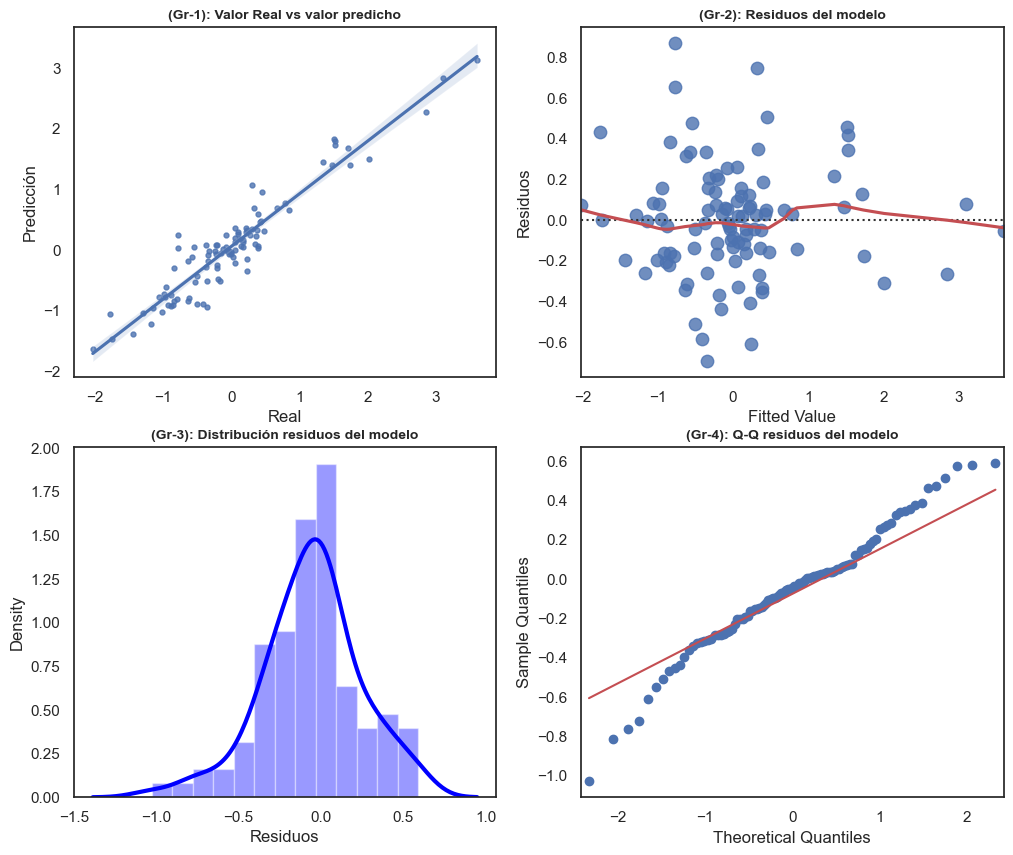

In [92]:
EstudioResiduals('Random Forest best',dfrf02)


Estudio de los residuos del modelo Random Forest RobustScaler sin RM:
 

- Prueba Shapiro-Wilk:
 
Resultado del Test de Hipótesis:


,Atributo,Stat,p-value,Resultado
0,Residuos,0.986049,0.369842,Probably Gaussian



- Diferentes Gráficas:
 


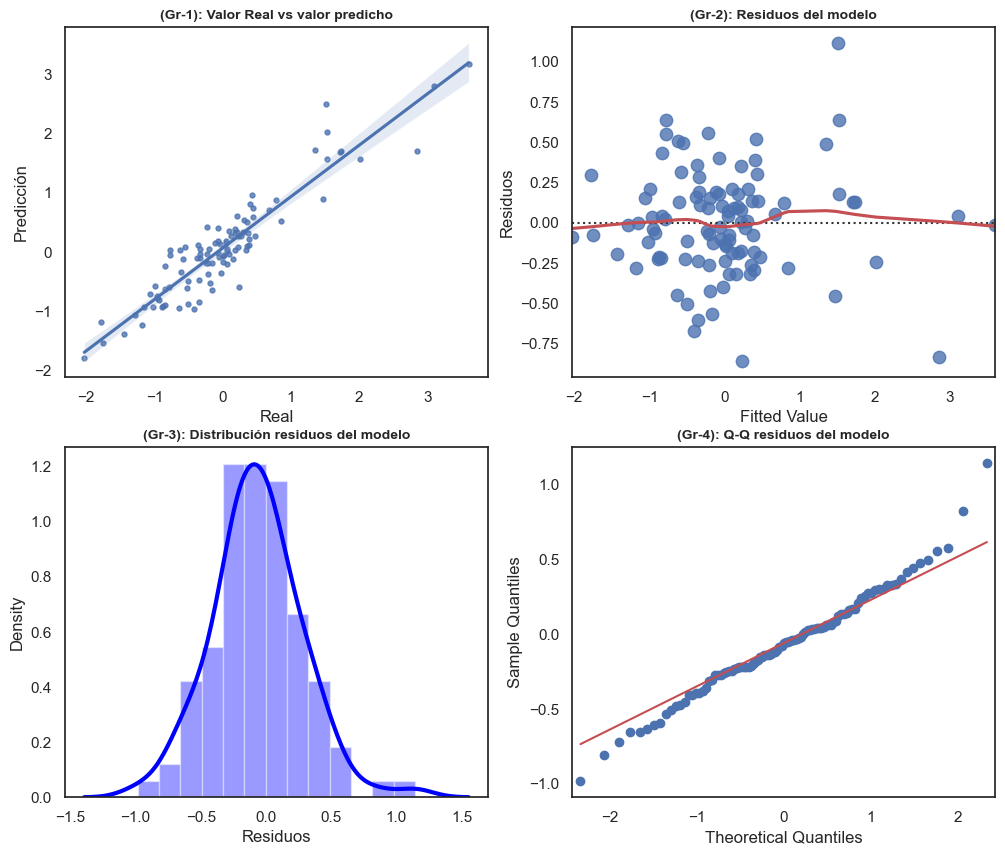

In [93]:
EstudioResiduals('Random Forest RobustScaler sin RM',dfrf03)

************

### <font color='#d50283'>Bibliográfia utilizada</font>

- <font color='##08a22a'>*Información del Sprint 06.*</font>
- <font color='##08a22a'></font> [Diagnóstico errores (residuos)](<https://www.cienciadedatos.net/documentos/py06_machine_learning_python_scikitlearn.html>)
- <font color='##08a22a'></font> [Multicolinealidad](<https://economipedia.com/definiciones/multicolinealidad.html>) 
- <font color='##08a22a'></font> [Multicolinealidad, Calcular FIV (Factor de inflación de la varianza)](<https://es.wikipedia.org/wiki/Factor_de_inflaci%C3%B3n_de_la_varianza#:~:text=En%20estad%C3%ADstica%2C%20el%20factor%20de,regresi%C3%B3n%20normal%20de%20m%C3%ADnimos%20cuadrados.>)
- <font color='##08a22a'></font> [Heterocedasticidad](<https://economipedia.com/definiciones/heterocedasticidad.html) 
- <font color='##08a22a'></font> [Homocedasticidad](<https://economipedia.com/definiciones/homocedasticidad.html) 
- <font color='##08a22a'></font> [Vivienda de Boston - Regresión lineal](<https://www.kaggle.com/code/deuterium06/boston-housing-linear-regression/notebook>) 
- <font color='##08a22a'></font> [Predicting Prices of Boston Housing Values](<https://nsamrao.github.io/Boston_Housing/>) 
- <font color='##08a22a'></font> [02-regression-boston-housing-python](<https://colab.research.google.com/github/RPI-DATA/course-intro-ml-app/blob/master/content/notebooks/12-intro-modeling-2/02-regression-boston-housing-python.ipynb>)  
- <font color='##08a22a'></font> [La regresión de mínimos cuadrados ordinarios ( OLS )](<https://www.geeksforgeeks.org/interpreting-the-results-of-linear-regression-using-ols-summary/>)